In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sf
import statsmodels.formula.api as smf

In [6]:
df = pd.read_csv('southafricanheart.csv').drop(columns='Unnamed: 0')

Las variables importadas son: ['sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea', 'obesity', 'alcohol', 'age', 'chd']


,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,138.326840,3.635649,4.740325,25.406732,53.103896,26.044113,17.044394,42.816017,0.346320
std,20.496317,4.593024,2.070909,7.780699,9.817534,4.213680,24.481059,14.608956,0.476313
min,101.000000,0.000000,0.980000,6.740000,13.000000,14.700000,0.000000,15.000000,0.000000
25%,124.000000,0.052500,3.282500,19.775000,47.000000,22.985000,0.510000,31.000000,0.000000
50%,134.000000,2.000000,4.340000,26.115000,53.000000,25.805000,7.510000,45.000000,0.000000
75%,148.000000,5.500000,5.790000,31.227500,60.000000,28.497500,23.892500,55.000000,1.000000
max,218.000000,31.200000,15.330000,42.490000,78.000000,46.580000,147.190000,64.000000,1.000000


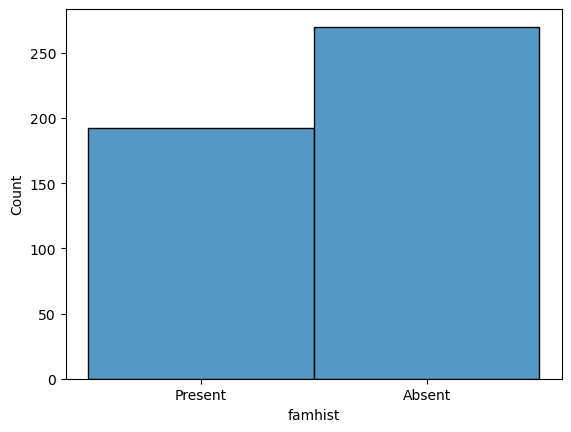

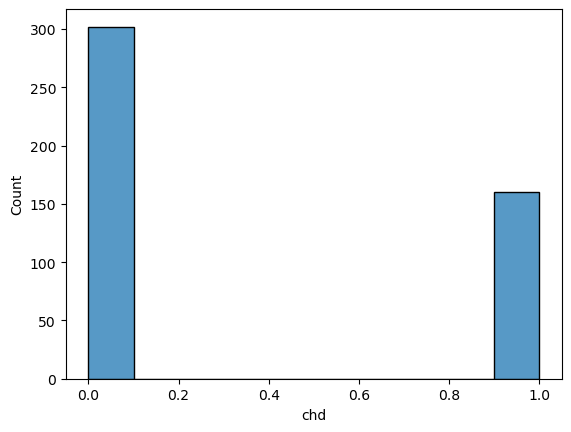

In [14]:
print(f'Las variables importadas son: {list(df.columns)}')
display(df.describe())
sns.histplot(df['famhist'])
plt.show()
sns.histplot(df['chd'])
plt.show()

In [15]:
# Desafio 2

df['famhist'] = df['famhist'].replace({'Present': 1, 'Absent': 0})

In [20]:
modelo = smf.logit('chd ~ famhist', df).fit()

# Log odd = intercept + pendiente * famhist

Optimization terminated successfully.
         Current function value: 0.608111
         Iterations 5


In [26]:
def inverse_logit(log_odd):
    '''Funcion que mapea un log odd a probabilidad'''
    return (1) / (1 + np.exp(-log_odd))

In [28]:
# Cual es la probabilidad de un individuo con antecedentes familiares de tener
# una enfermedad coronaria? Familia con enfermedad coronaria = 1

log_odd_con_enfermedad_coronaria = modelo.params['Intercept'] + modelo.params['famhist'] * 1
prob_con_enfermedad_coronaria = inverse_logit(log_odd_con_enfermedad_coronaria)
print(f'La probabilidad de que una persona con un familiar con antecedentes familiar desarrolle '
      f'una enfermedad coronaria es: {prob_con_enfermedad_coronaria:.2f}')

La probabilidad de que una persona con un familiar con antecedentes familiar desarrolle una enfermedad coronaria es: 0.50


In [29]:
# Cual es la probabilidad de un individuo con antecedentes familiares de tener
# una enfermedad coronaria? Familia sin enfermedad coronaria = 0

log_odd_sin_enfermedad_coronaria = modelo.params['Intercept'] + modelo.params['famhist'] * 0
prob_sin_enfermedad_coronaria = inverse_logit(log_odd_sin_enfermedad_coronaria)
print(f'La probabilidad de que una persona con un familiar sin antecedentes familiar desarrolle '
      f'una enfermedad coronaria es: {prob_sin_enfermedad_coronaria:.2f}')

La probabilidad de que una persona con un familiar sin antecedentes familiar desarrolle una enfermedad coronaria es: 0.24


- La diferencia de probabilidad entre un individuo con antecedentes familiares y uno sin antecedentes familiares es del 26%

In [30]:
modelo_lineal = smf.ols('chd ~ famhist', df).fit()

In [34]:
display(modelo_lineal.summary())

# Segun el modelo lineal, una persona sin antecesdentes familiares
# tendria una probabilidad de 0.2370 de desarrollar una enfermedad coronaria. Por el contrario,
# una persona con antecedentes familiares tendria una probabilidad de 0.5.
# Por lo tanto, las estimaciones entre los modelos son similares.

print(modelo.params['famhist'] / 4)

# Ademas, al dividir el parametro de famhist del modelo logistico por 4, se obtuvo un valor de
# 0.29. Por lo tanto, existe una diferencia de 0.29 - 0.2630 = 0.03 segun esta aproximacion entre
# ambos modelos.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    chd   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     36.86
Date:                Sat, 21 Jan 2023   Prob (F-statistic):           2.66e-09
Time:                        00:12:29   Log-Likelihood:                -294.59
No. Observations:                 462   AIC:                             593.2
Df Residuals:                     460   BIC:                             601.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2370      0.028      8.489      0.000       0.182       0.292
famhist        0.2630      0.043      6.071      0.000       0.178       0.348
==============================================================================
Omnibus:                      768.898   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.778
Skew:                           0.579   Prob(JB):                     1.72e-13
Kurtosis:                       1.692   Cond. No.                         2.47
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

0.2922482713574773

In [36]:
modelo_log_completo = smf.logit(
    'chd ~ sbp + tobacco + ldl + adiposity + famhist + typea + obesity + alcohol + age', df).fit()


Optimization terminated successfully.
         Current function value: 0.510974
         Iterations 6


In [37]:
modelo_log_completo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    chd   No. Observations:                  462
Model:                          Logit   Df Residuals:                      452
Method:                           MLE   Df Model:                            9
Date:                Sat, 21 Jan 2023   Pseudo R-squ.:                  0.2080
Time:                        00:17:37   Log-Likelihood:                -236.07
converged:                       True   LL-Null:                       -298.05
Covariance Type:            nonrobust   LLR p-value:                 2.055e-22
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.1507      1.308     -4.701      0.000      -8.715      -3.587
sbp            0.0065      0.006      1.135      0.256      -0.005       0.018
tobacco        0.0794      0.027      2.984      0.003       0.027       0.132
ldl            0.1739      0.060      2.915      0.004       0.057       0.291
adiposity      0.0186      0.029      0.635      0.526      -0.039       0.076
famhist        0.9254      0.228      4.061      0.000       0.479       1.372
typea          0.0396      0.012      3.214      0.001       0.015       0.064
obesity       -0.0629      0.044     -1.422      0.155      -0.150       0.024
alcohol        0.0001      0.004      0.027      0.978      -0.009       0.009
age            0.0452      0.012      3.728      0.000       0.021       0.069
==============================================================================
"""

In [39]:
# Segun los resultados, las variables significativas (P < 0.05) son: tobacco, ldl, famhist, typea, age
modelo_depurado = smf.logit('chd ~ tobacco + ldl + famhist + typea + age', df).fit()
modelo_depurado.summary()

Optimization terminated successfully.
         Current function value: 0.514811
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    chd   No. Observations:                  462
Model:                          Logit   Df Residuals:                      456
Method:                           MLE   Df Model:                            5
Date:                Sat, 21 Jan 2023   Pseudo R-squ.:                  0.2020
Time:                        00:19:44   Log-Likelihood:                -237.84
converged:                       True   LL-Null:                       -298.05
Covariance Type:            nonrobust   LLR p-value:                 2.554e-24
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.4464      0.921     -7.000      0.000      -8.251      -4.642
tobacco        0.0804      0.026      3.106      0.002       0.030       0.131
ldl            0.1620      0.055      2.947      0.003       0.054       0.270
famhist        0.9082      0.226      4.023      0.000       0.466       1.351
typea          0.0371      0.012      3.051      0.002       0.013       0.061
age            0.0505      0.010      4.944      0.000       0.030       0.070
==============================================================================
"""

Al comparar el modelo completo y el modelo depurado se pudieron observar los siguientes valores:

Metrica| Modelo Completo | Modelo Depurado | Diferencia
-------|---------|-----------------|-----------
Log Likelihood | -236.07 | -237.84 | -1.77
LL-Null | -298.05 | -298.05 | 0

Por lo tanto, el modelo depurado tiene un log likelihood mas bajo que el modelo completo. Ademas, ambos modelos tienen un LL-Null identico. Teniendo en cuenta los resultados previos, el modelo depurado es mejor, ya que es mas parsimonioso (menos cantidad de variables), y tiene valores de bondad de ajuste similares a los del modelo completo.
